In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
kpmg = pd.read_excel('HomeTest 1 - KPMG Data.xlsx')
kpmg.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1.0,2.0,2950.0,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2.0,3.0,3120.0,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3.0,37.0,402.0,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4.0,88.0,3135.0,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5.0,78.0,787.0,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [255]:
kpmg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  float64       
 1   product_id               20000 non-null  float64       
 2   customer_id              20000 non-null  float64       
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [256]:
# Evaluate the columns have the missing values
subset=['online_order', 'brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date']
kpmg[kpmg[subset].isna().any(axis=1)]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98.0,49.0,333.0,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
136,137.0,0.0,431.0,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160.0,0.0,3300.0,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
166,167.0,90.0,3177.0,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170.0,6.0,404.0,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19635,19636.0,98.0,1389.0,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0
19793,19794.0,0.0,2860.0,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19843,19844.0,3.0,8.0,2017-01-28,NaN,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,37823.0
19859,19860.0,0.0,2468.0,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


In [257]:
# subset the dataframe
order_approved = kpmg[kpmg['order_status'] == 'Approved'][['customer_id','transaction_date','transaction_id', 'list_price']]
order_approved

,customer_id,transaction_date,transaction_id,list_price
0,2950.0,2017-02-25,1.0,71.49
1,3120.0,2017-05-21,2.0,2091.47
2,402.0,2017-10-16,3.0,1793.43
3,3135.0,2017-08-31,4.0,1198.46
4,787.0,2017-10-01,5.0,1765.30
...,...,...,...,...
19995,1018.0,2017-06-24,19996.0,2005.66
19996,127.0,2017-11-09,19997.0,416.98
19997,2284.0,2017-04-14,19998.0,1636.90
19998,2764.0,2017-07-03,19999.0,227.88


In [258]:
# get the first day of the month of transaction_date
order_approved['trans_month']= order_approved['transaction_date'].astype('datetime64[M]')
order_approved

,customer_id,transaction_date,transaction_id,list_price,trans_month
0,2950.0,2017-02-25,1.0,71.49,2017-02-01
1,3120.0,2017-05-21,2.0,2091.47,2017-05-01
2,402.0,2017-10-16,3.0,1793.43,2017-10-01
3,3135.0,2017-08-31,4.0,1198.46,2017-08-01
4,787.0,2017-10-01,5.0,1765.30,2017-10-01
...,...,...,...,...,...
19995,1018.0,2017-06-24,19996.0,2005.66,2017-06-01
19996,127.0,2017-11-09,19997.0,416.98,2017-11-01
19997,2284.0,2017-04-14,19998.0,1636.90,2017-04-01
19998,2764.0,2017-07-03,19999.0,227.88,2017-07-01


In [259]:
# Creat the cohort_month: the month that customer had the first transaction
order_approved['cohort_month'] = order_approved.groupby('customer_id')['trans_month'].transform('min')
# order_approved.groupby('customer_id').agg({'trans_month':'min'})
order_approved

,customer_id,transaction_date,transaction_id,list_price,trans_month,cohort_month
0,2950.0,2017-02-25,1.0,71.49,2017-02-01,2017-02-01
1,3120.0,2017-05-21,2.0,2091.47,2017-05-01,2017-01-01
2,402.0,2017-10-16,3.0,1793.43,2017-10-01,2017-01-01
3,3135.0,2017-08-31,4.0,1198.46,2017-08-01,2017-02-01
4,787.0,2017-10-01,5.0,1765.30,2017-10-01,2017-01-01
...,...,...,...,...,...,...
19995,1018.0,2017-06-24,19996.0,2005.66,2017-06-01,2017-01-01
19996,127.0,2017-11-09,19997.0,416.98,2017-11-01,2017-01-01
19997,2284.0,2017-04-14,19998.0,1636.90,2017-04-01,2017-04-01
19998,2764.0,2017-07-03,19999.0,227.88,2017-07-01,2017-02-01


In [260]:
# Create the cohort_index
def calculate_cohort(df, trans_month, cohort_month):
    year_diff = df[trans_month].dt.year - df[cohort_month].dt.year
    month_diff = df[trans_month].dt.month - df[cohort_month].dt.month
    cohort_index = year_diff*12 + month_diff + 1
    return cohort_index
order_approved['cohort_index'] = calculate_cohort(df=order_approved, trans_month='trans_month', cohort_month='cohort_month')
order_approved

,customer_id,transaction_date,transaction_id,list_price,trans_month,cohort_month,cohort_index
0,2950.0,2017-02-25,1.0,71.49,2017-02-01,2017-02-01,1
1,3120.0,2017-05-21,2.0,2091.47,2017-05-01,2017-01-01,5
2,402.0,2017-10-16,3.0,1793.43,2017-10-01,2017-01-01,10
3,3135.0,2017-08-31,4.0,1198.46,2017-08-01,2017-02-01,7
4,787.0,2017-10-01,5.0,1765.30,2017-10-01,2017-01-01,10
...,...,...,...,...,...,...,...
19995,1018.0,2017-06-24,19996.0,2005.66,2017-06-01,2017-01-01,6
19996,127.0,2017-11-09,19997.0,416.98,2017-11-01,2017-01-01,11
19997,2284.0,2017-04-14,19998.0,1636.90,2017-04-01,2017-04-01,1
19998,2764.0,2017-07-03,19999.0,227.88,2017-07-01,2017-02-01,6


In [261]:
# Calculate the number of customers
cohort_data = order_approved.groupby(['cohort_index', 'cohort_month'], as_index=False).\
                agg(nb_customer=('customer_id', 'nunique'))
cohort_data

,cohort_index,cohort_month,nb_customer
0,1,2017-01-01,1347
1,1,2017-02-01,800
2,1,2017-03-01,484
3,1,2017-04-01,337
4,1,2017-05-01,213
...,...,...,...
73,10,2017-02-01,306
74,10,2017-03-01,180
75,11,2017-01-01,492
76,11,2017-02-01,292


In [262]:
cohort_data = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='nb_customer')
cohort_data.index = cohort_data.index.strftime('%Y-%m')
cohort_data

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2017-01,1347.0,483.0,505.0,499.0,492.0,475.0,513.0,524.0,489.0,524.0,492.0,510.0
2017-02,800.0,322.0,297.0,311.0,283.0,297.0,306.0,281.0,325.0,306.0,292.0,NaN
2017-03,484.0,167.0,172.0,164.0,180.0,184.0,173.0,209.0,186.0,180.0,NaN,NaN
2017-04,337.0,110.0,121.0,152.0,142.0,118.0,144.0,125.0,129.0,NaN,NaN,NaN
2017-05,213.0,86.0,83.0,88.0,73.0,73.0,74.0,83.0,NaN,NaN,NaN,NaN
2017-06,123.0,45.0,44.0,47.0,45.0,45.0,54.0,NaN,NaN,NaN,NaN,NaN
2017-07,77.0,26.0,26.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,51.0,18.0,22.0,18.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,24.0,8.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
cohort_table = cohort_data.div(cohort_data.iloc[:,0], axis=0)
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2017-01,1.0,0.358575,0.374907,0.370453,0.365256,0.352635,0.380846,0.389013,0.363029,0.389013,0.365256,0.378619
2017-02,1.0,0.402500,0.371250,0.388750,0.353750,0.371250,0.382500,0.351250,0.406250,0.382500,0.365000,NaN
2017-03,1.0,0.345041,0.355372,0.338843,0.371901,0.380165,0.357438,0.431818,0.384298,0.371901,NaN,NaN
2017-04,1.0,0.326409,0.359050,0.451039,0.421365,0.350148,0.427300,0.370920,0.382789,NaN,NaN,NaN
2017-05,1.0,0.403756,0.389671,0.413146,0.342723,0.342723,0.347418,0.389671,NaN,NaN,NaN,NaN
2017-06,1.0,0.365854,0.357724,0.382114,0.365854,0.365854,0.439024,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.337662,0.337662,0.415584,0.480519,0.311688,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.352941,0.431373,0.352941,0.254902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.333333,0.291667,0.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


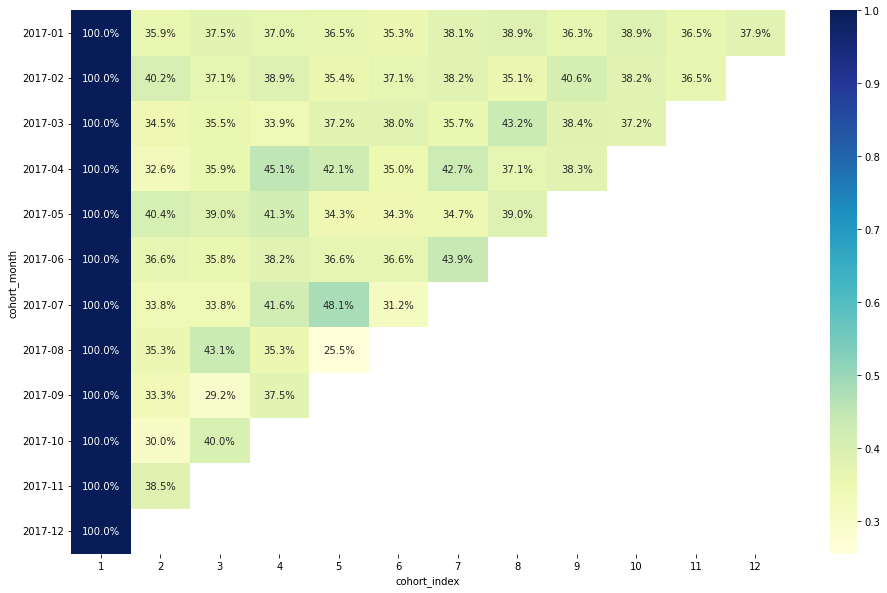

In [264]:
plt.figure(figsize=(16,10))
sns.heatmap(cohort_table, annot=True, cmap="YlGnBu",fmt=".1%")
plt.yticks( rotation='360')
plt.show()

### Nhận xét
- tỉ lệ giao động từ 30-40% lượng khách hàng quay trở lại mua sắm sau 1 tháng tính từ lần đầu thực hiện giao dịch. Nhưng mức tỉ lệ này được duy trì tương đối đều đặn ở các tháng tiếp theo
- những KH bắt đầu mua lần đầu vào nửa đầu năm (nhóm 2017-01 đến 2017-07) có tỉ lệ duy trì mua hàng phần lớn từ >35% đến 40%.
    + Nhóm 2017-02 ở tháng thứ 2 có tỉ lệ 40.2%, tháng thứ 9 là 40.6%
    + Nhóm 2017-04 ở tháng thứ 4, thứ 5, và thứ 7 ở mức > 40%, lần lượt là 45.1%, 42.1% và 42.7%
    + Nhóm 2017-07 có tháng thứ 4 là 41.6%, tháng thứ 5 là 48.1% 
- 2 nhóm 2017-08, 2017-09 là có xuất hiện tỉ lệ <30% (2017-8 ở tháng thứ 5 có tỉ lệ 25.5%, 20170-09 ở tháng thứ 3 có tỉ lệ 29.2%)
- Tháng thứ 4 có tỉ lệ các nhóm KH quay lại > 40% nhiều nhất (2017-04: 45.1%, 2017-05: 41.3%, 2017-07: 41.6%), các nhóm KH khác cũng có tỉ lệ tương đối cao